# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [123]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return z ** 3 - 1

def dg(z):
    return 3 * z**2

def f(z,n):
  if n==2:
    return np.sin(z)
  elif n==1:
    return z**3 - 2*z + 2
  else:
    return z**3-1

def df(z,n):
  if n==2:
    return np.cos(z)
  elif n==3:
    return 3*z**2 - 0
  elif n==1:
    return 3*z**2 - 2
  else:
    return 0

def raices(n):
    if n==2:
      return 0
    elif n==1:
      return (-1.769292, 0)
    else:
      return 0

def ClassicPos(a,b,c):
  return (-b + np.sqrt((b**2)-(4*a*c)))/(2*a)
def ClassicNeg(a,b,c):
  return (-b - np.sqrt((b**2)-(4*a*c)))/(2*a)
def NewMetodPos(a,b,c):
  p = -b;
  q = c;
  a = 1;
  return (p/2) + np.sqrt(((p/2)**2)-q)
def NewMetodNeg(a,b,c):
  p = -b;
  q = c;
  a = 1;
  return (p/2) - np.sqrt(((p/2)**2)-q)
def newtomCon15Real():
  z=10.0 + 0.0j
  r=[]
  i=[]
  for k in range(200):
    dz = dg(z)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z=10.0 + 0.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

def newtomCon15imaginario():
  z=0.0 + 10.0j
  r=[]
  i=[]
  for k in range(200):
    dz = dg(z)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z=0.0 + 10.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, n=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z, n)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,n) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                #pixels[height-y-1,x] = ((np.pi*z/2)% 16 * 32, ((np.pi*z/2)% 8 * 64, ((np.pi*z/2) % 4 * 64)            
                var=i

                if n==2:
                  var=i*math.pi/2
                  pixels[y,x] = (var%64*4, var%128*2, var%8*3)  

                if n==3:  
                  pixels[height-y-1,x] = (var % 16 * 32, var % 8 * 64, var % 4 * 64)  
                
                if n==1:
                  roots=raices(1)
                  if abs(z-roots[0])<eps:
                    pixels[y,x] = (100, 100, 100)
                  else:
                    pixels[height-y-1,x] = (var % 16 * 32, 255 - count*multcol, 255 - count*multcol)

    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256,n=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, n=n)
    if n==1:
      plt.title('Fractal de newton f(z)=z**3 - 2*z + 2')
    if n==2:
      plt.title('Newton Fractal f(z)=sen(z)')
    if n==3:
      plt.title('Newton Fractal f(z)=z**3-1')
    
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()



## Plot of f(z)= z\*\*3-1 for the reals f(x)= x\*\*3-1

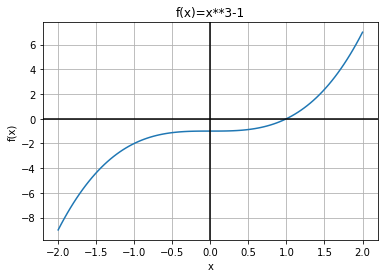

In [102]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x**3-1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


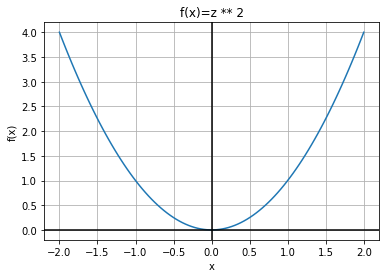

'La raiz Positiva por Classic está en: '

0.0

'La raiz Negativa por Classic está en: '

0.0

'La raiz Positiva por New está en: '

0.0

'La raiz Negativa por New está en: '

0.0

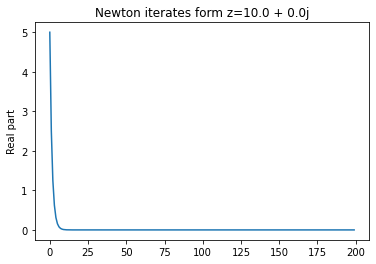

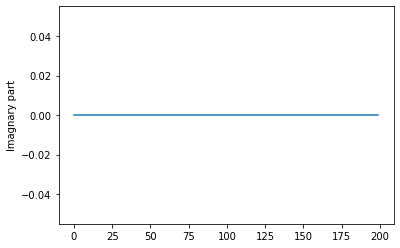

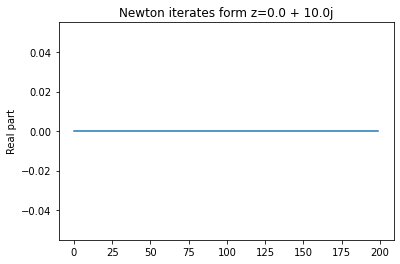

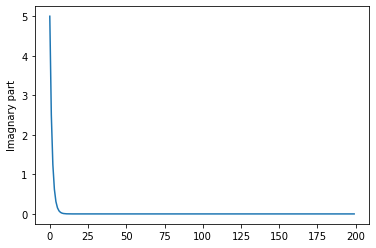

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


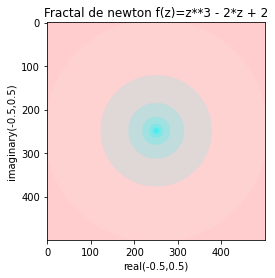

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


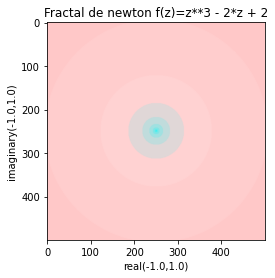

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


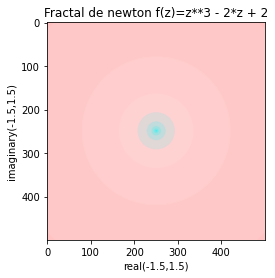

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


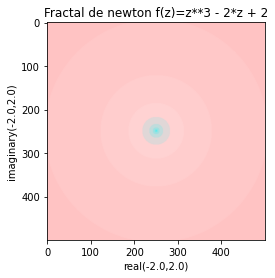

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


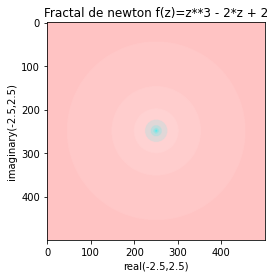

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


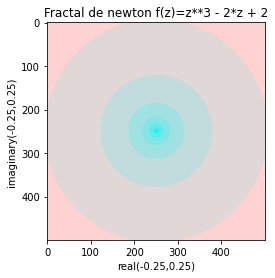

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


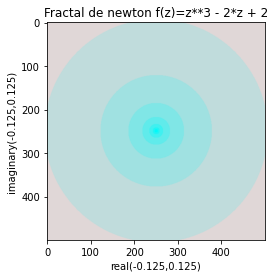

Z region from ( -0.0625 , -0.0625 ) to ( 0.0625 , 0.0625 )


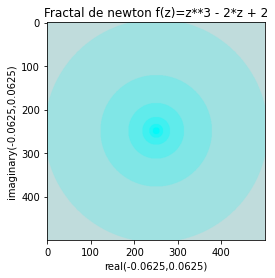

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


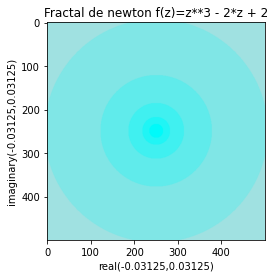

Z region from ( -0.015625 , -0.015625 ) to ( 0.015625 , 0.015625 )


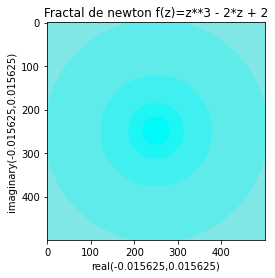

In [124]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return z ** 2

def dg(z):
    return 2 * z

def f(z,n):
    return z ** 2

def df(z,n):
    return 2 * z

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=z ** 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

display("La raiz Positiva por Classic está en: ", ClassicPos(1,0,0))
display("La raiz Negativa por Classic está en: ", ClassicNeg(1,0,0))
display("La raiz Positiva por New está en: ", NewMetodPos(1,0,0))
display("La raiz Negativa por New está en: ", NewMetodNeg(1,0,0))

newtomCon15Real();
newtomCon15imaginario();

print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=1/2)
display1(zoom=1/4)
display1(zoom=1/8)
display1(zoom=1/16)
display1(zoom=1/32)

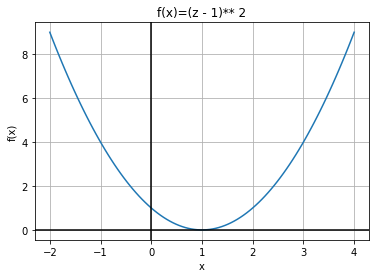

'La raiz Positiva por Classic está en: '

1.0

'La raiz Negativa por Classic está en: '

1.0

'La raiz Positiva por New está en: '

1.0

'La raiz Negativa por New está en: '

1.0

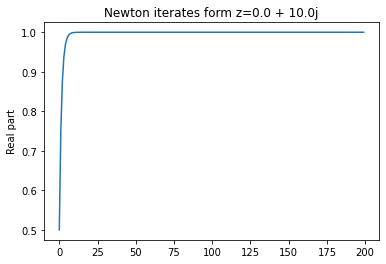

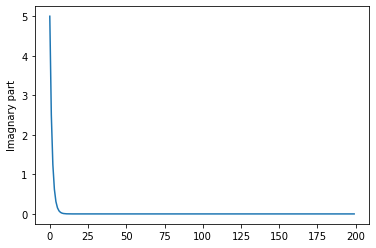

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


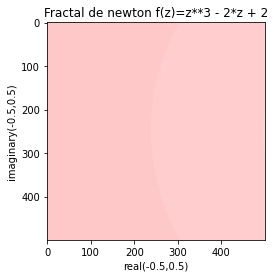

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


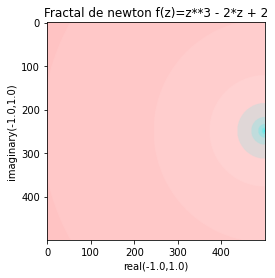

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


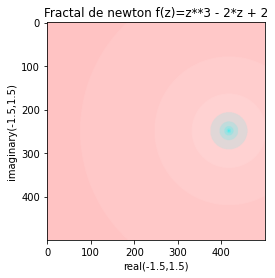

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


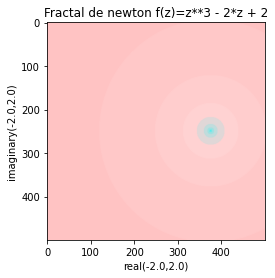

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


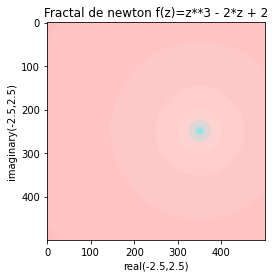

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


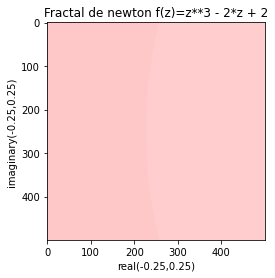

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


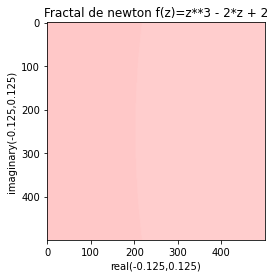

Z region from ( -0.0625 , -0.0625 ) to ( 0.0625 , 0.0625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


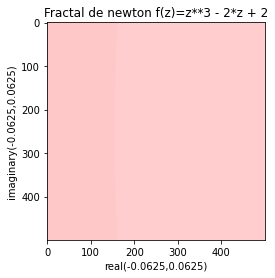

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


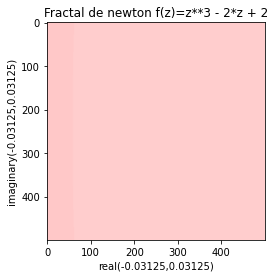

Z region from ( -0.015625 , -0.015625 ) to ( 0.015625 , 0.015625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


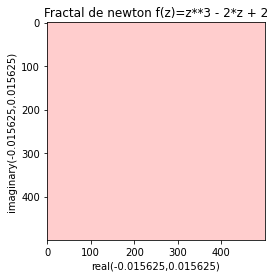

In [125]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return (z - 1)** 2
def dg(z):
    return 2 * (z - 1)

def f(z,n):
    return (z - 1)** 2
def df(z,n):
    return 2 * (z - 1)
x = np.linspace(-2.0,4.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(z - 1)** 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

display("La raiz Positiva por Classic está en: ", ClassicPos(1,-2,1))
display("La raiz Negativa por Classic está en: ", ClassicNeg(1,-2,1))
display("La raiz Positiva por New está en: ", NewMetodPos(1,-2,1))
display("La raiz Negativa por New está en: ", NewMetodNeg(1,-2,1))

#newtomCon15Real();
newtomCon15imaginario();

print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=1/2)
display1(zoom=1/4)
display1(zoom=1/8)
display1(zoom=1/16)
display1(zoom=1/32)

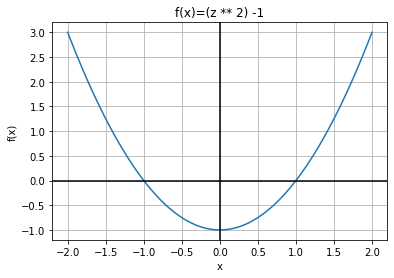

'La raiz Positiva por Classic está en: '

1.0

'La raiz Negativa por Classic está en: '

-1.0

'La raiz Positiva por New está en: '

1.0

'La raiz Negativa por New está en: '

-1.0

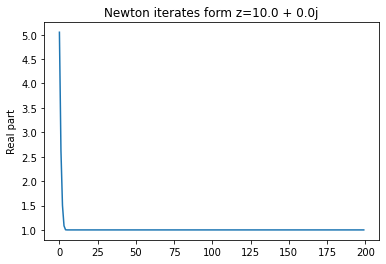

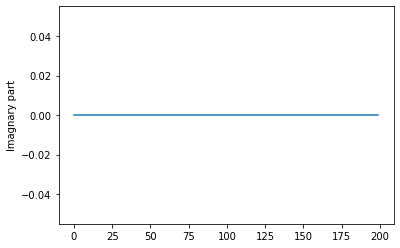

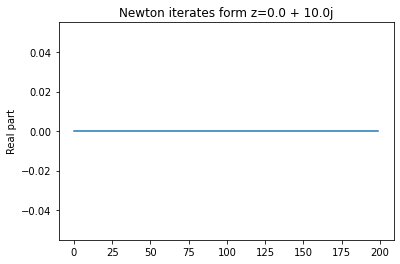

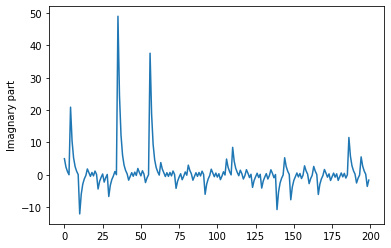

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


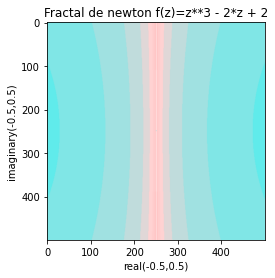

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


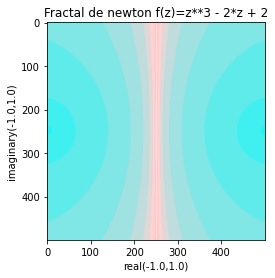

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


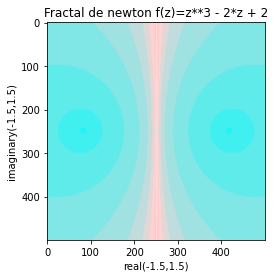

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


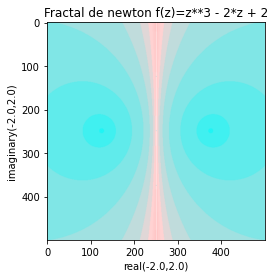

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


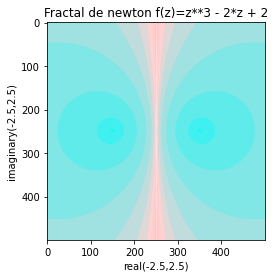

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


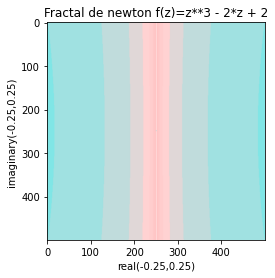

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


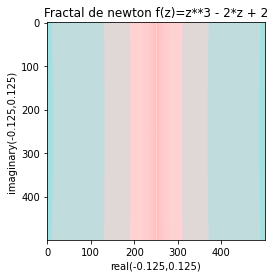

Z region from ( -0.0625 , -0.0625 ) to ( 0.0625 , 0.0625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


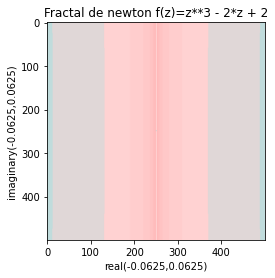

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


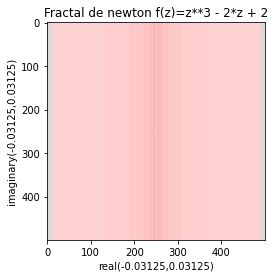

Z region from ( -0.015625 , -0.015625 ) to ( 0.015625 , 0.015625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


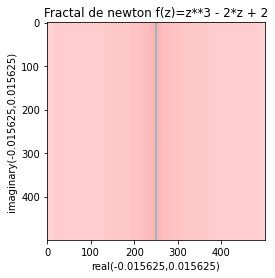

In [128]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return (z ** 2) -1
def dg(z):
    return 2 * z
def f(z,n):
    return (z ** 2) -1
def df(z,n):
    return 2 * z

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(z ** 2) -1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

display("La raiz Positiva por Classic está en: ", ClassicPos(1,0,-1))
display("La raiz Negativa por Classic está en: ", ClassicNeg(1,0,-1))
display("La raiz Positiva por New está en: ", NewMetodPos(1,0,-1))
display("La raiz Negativa por New está en: ", NewMetodNeg(1,0,-1))

newtomCon15Real();
newtomCon15imaginario();

print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=1/2)
display1(zoom=1/4)
display1(zoom=1/8)
display1(zoom=1/16)
display1(zoom=1/32)

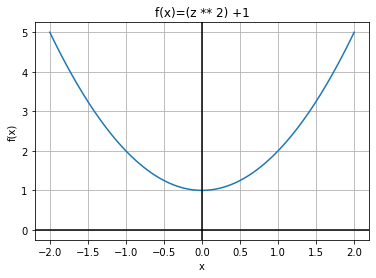

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in sqrt


'La raiz Positiva por Classic está en: '

nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


'La raiz Negativa por Classic está en: '

nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


'La raiz Positiva por New está en: '

nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in sqrt


'La raiz Negativa por New está en: '

nan

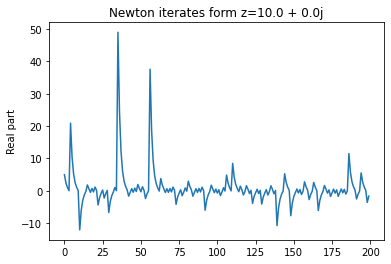

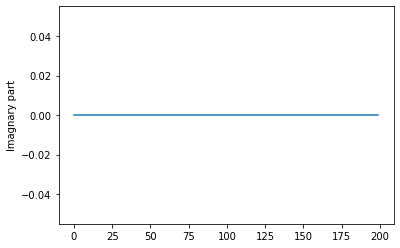

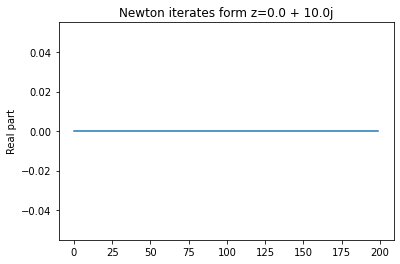

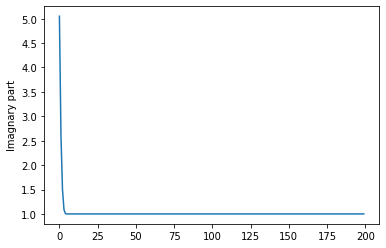

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


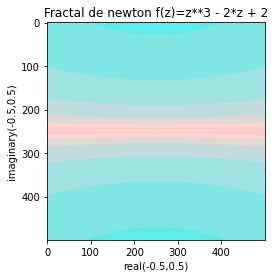

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


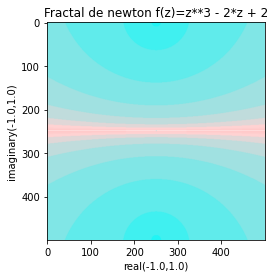

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


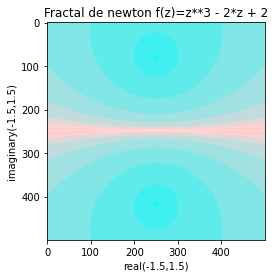

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


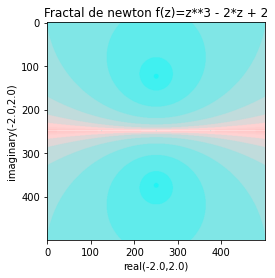

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


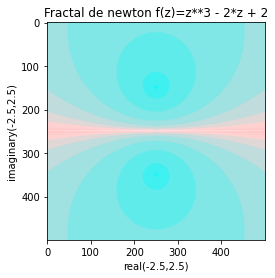

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


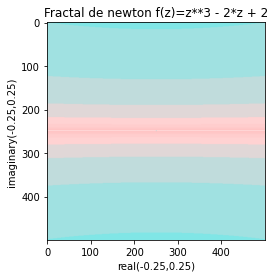

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


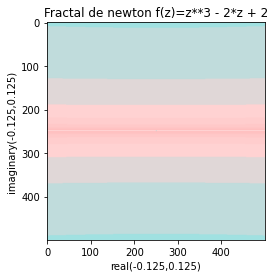

Z region from ( -0.0625 , -0.0625 ) to ( 0.0625 , 0.0625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


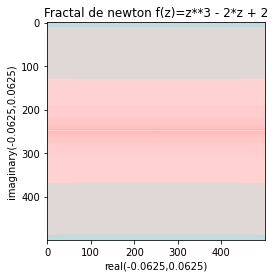

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


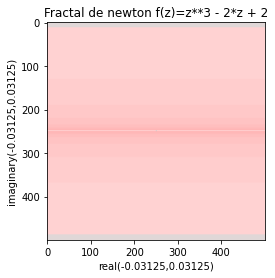

Z region from ( -0.015625 , -0.015625 ) to ( 0.015625 , 0.015625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


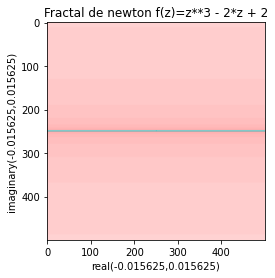

In [129]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return (z ** 2) +1
def dg(z):
    return 2 * z
def f(z,n):
    return (z ** 2) +1
def df(z,n):
    return 2 * z

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(z ** 2) +1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

display("La raiz Positiva por Classic está en: ", ClassicPos(1,0,1))
display("La raiz Negativa por Classic está en: ", ClassicNeg(1,0,1))
display("La raiz Positiva por New está en: ", NewMetodPos(1,0,1))
display("La raiz Negativa por New está en: ", NewMetodNeg(1,0,1))

newtomCon15Real();
newtomCon15imaginario();

print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=1/2)
display1(zoom=1/4)
display1(zoom=1/8)
display1(zoom=1/16)
display1(zoom=1/32)

Sucede que los coeficiente dentro de la raiz dan sqrt(b^2 - 4*1*1) por lo que raiz de -2 = 1  + 1i
esa seria la raiz

Aqui debido a que la raiz en los reales no existe se queda iterando indefinidamente

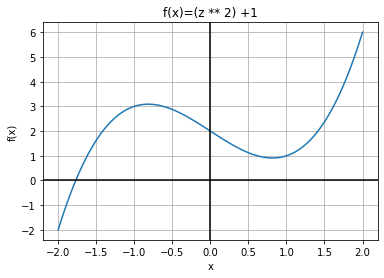

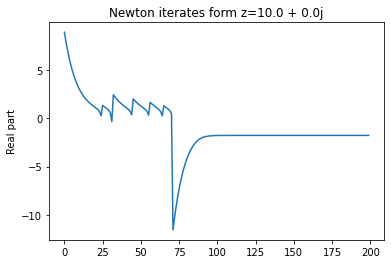

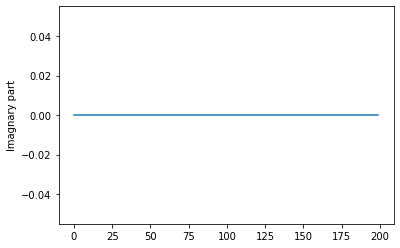

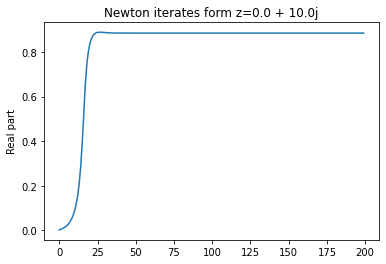

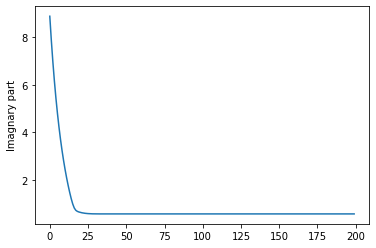

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


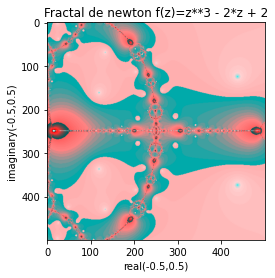

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


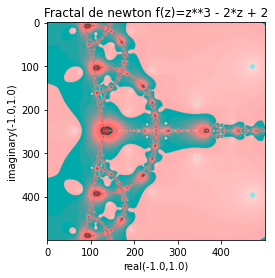

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


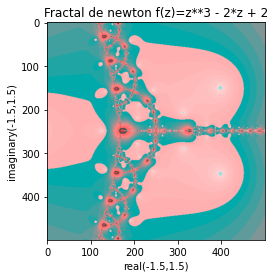

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


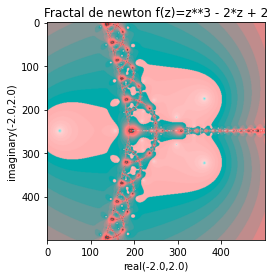

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


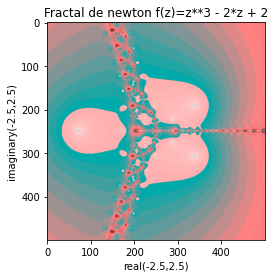

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


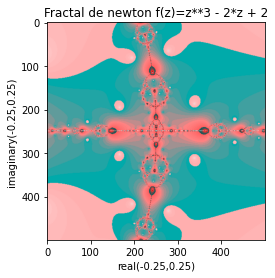

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


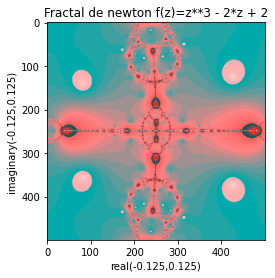

Z region from ( -0.0625 , -0.0625 ) to ( 0.0625 , 0.0625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


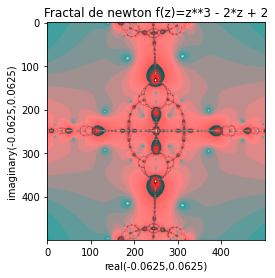

Z region from ( -0.03125 , -0.03125 ) to ( 0.03125 , 0.03125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


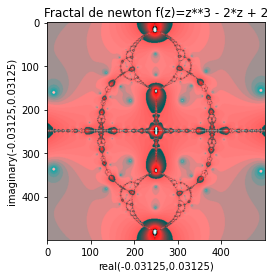

Z region from ( -0.015625 , -0.015625 ) to ( 0.015625 , 0.015625 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


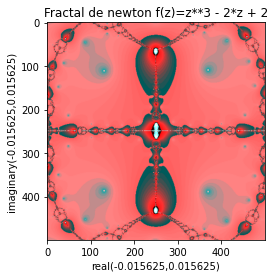

In [132]:
import math
import matplotlib.pyplot as plt
import numpy as np

def g(z):
    return (z ** 3) - (2 * z) + 2
def dg(z):
    return ((3 * z) ** 2) - 2

def f(z,n):
    return (z ** 3) - (2 * z) + 2
def df(z,n):
    return ((3 * z) ** 2) - 2

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(z ** 2) +1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

newtomCon15Real();
newtomCon15imaginario();

print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)
display1(zoom=1/2)
display1(zoom=1/4)
display1(zoom=1/8)
display1(zoom=1/16)
display1(zoom=1/32)

La verdad no sé como se interpreta eso :v
